In [281]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [224]:
df_original = pd.read_csv('dataset.csv')

# Проверка данных

In [225]:
df_original.drop(["Unnamed: 0", "track_id"], axis=1, inplace=True) # Убираем колонки с индексами и id 
df_original

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
df_original.info() #смотрим, какие типы данных и сколько Non-Null есть в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

Значения оставшихся столбцов:  
artists - исполнители  
album_name - название альбома  
track_name - название трека  
popularity - таргет. Популярность трека выраженная в числе от 0 до 100  
duration_ms - длитьельность трека в миллисекундах
explicit - есть ли в треке нецензурная брань и откровенные сцены  
danceability - танцевальность трека  
energy - энергичность трека  
key - тональность  
loudness - громкость  
mode - режим аудиозаписи  
speechiness - доля вокала  
acousticness - звучание трека
instrumentalness - инструментальность трека  
liveness - живость трека
valence - привлекательность трека  
tempo - темп  трека  
time_signature - такт  
track_genre - жанр

In [227]:
df_original.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Посомтрим где есть NaN

In [228]:
df_original[df_original.isnull().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Удалим запись с путыми заначениями

In [229]:
df_original.dropna(inplace=True)

In [230]:
df_original.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Посмотрим, какие значения и в каком виде записаны в категориальных колонках

In [231]:
numerical_features = df_original.select_dtypes(include=['number']).columns.tolist()
categorical_features = df_original.select_dtypes(include=['object']).columns.tolist()

In [232]:
categorical_features

['artists', 'album_name', 'track_name', 'track_genre']

In [233]:
df_original.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [234]:
df_original.artists.unique()

array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN', ...,
       'Cuencos Tibetanos Sonidos Relajantes',
       'Bryan & Katie Torwalt;Brock Human', 'Jesus Culture'], dtype=object)

In [235]:
df_original.track_name.unique()

array(['Comedy', 'Ghost - Acoustic', 'To Begin Again', ...,
       'Water Into Light', 'Miss Perfumado', 'Barbincor'], dtype=object)

In [236]:
df_original.album_name.unique()

array(['Comedy', 'Ghost (Acoustic)', 'To Begin Again', ...,
       '#20 Sueños Vividos - Música Intrumental Suave 2018 para Dormir Bien y Relajarse Profundamente',
       'Frecuencias Álmicas en 432hz (Solo Piano)', 'Revelation Songs'],
      dtype=object)

Закодируем категориальные колонки, чтобы с ними можно было работать

In [237]:
df = df_original.copy()
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [238]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df["explicit"] = LabelEncoder().fit_transform(df["explicit"])

In [239]:
# Переводим время из миллисекукнд в минуты для уменьшения разброса

df['durarion_m']=df['duration_ms'] / 1000 / 60
df.drop(['duration_ms'], inplace=True, axis=1)

In [284]:
df.isnull().sum() # Убеждаемся, что не появилось null

album_name                    0
track_name                    0
popularity                    0
explicit                      0
energy                        0
key                           0
mode                          0
speechiness                   0
instrumentalness              0
track_genre                   0
durarion_m                    0
artists_popularity            0
artists_count                 0
balanced_energy               0
danceability_and_valence      0
acoustisticness_and_energy    0
dtype: int64

In [241]:
df.explicit.value_counts(val for val in df.explicit.unique()) # Смотрим, чтобы explicit было верно закодировано и нулей explicit

explicit
0    0.914499
1    0.085501
Name: proportion, dtype: float64

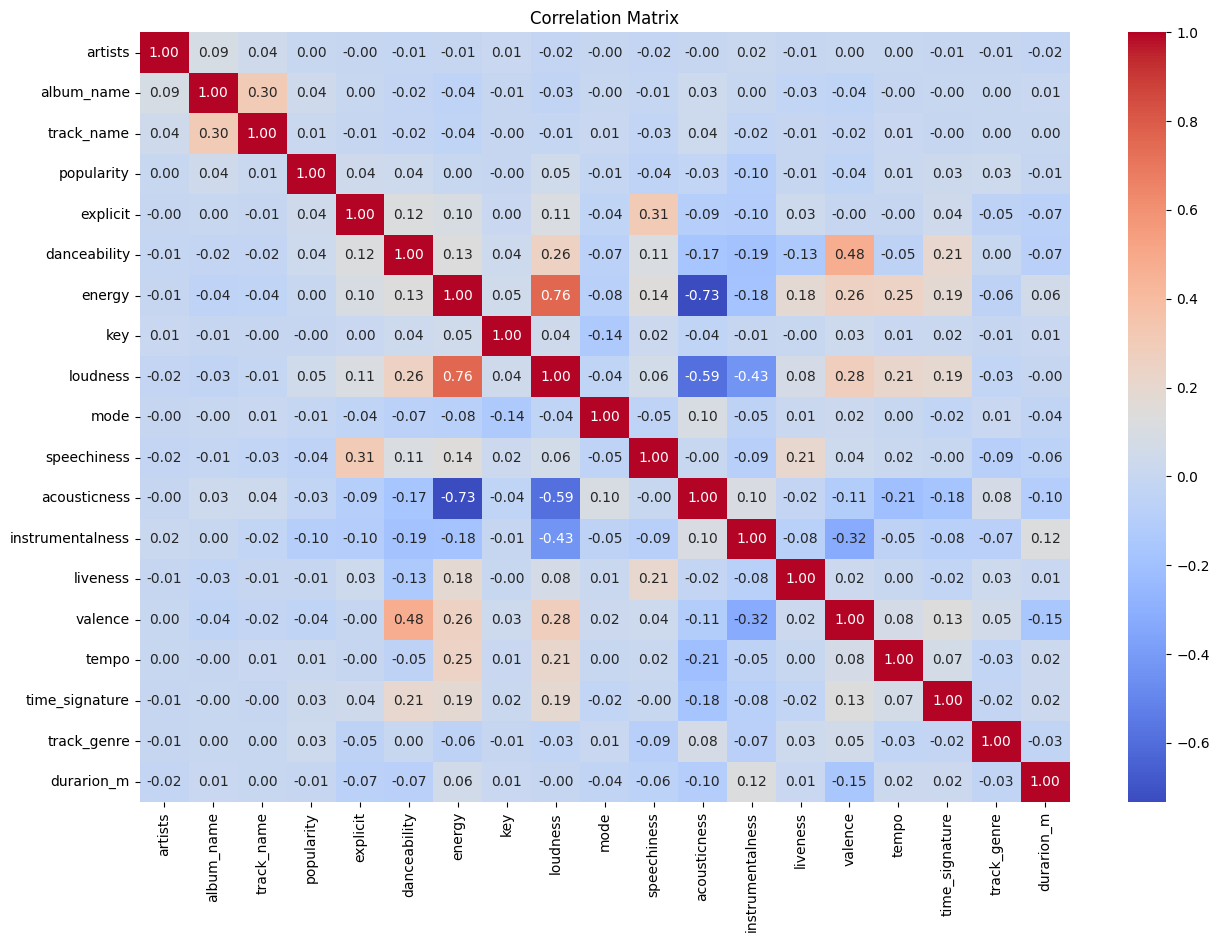

In [242]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


Energy имеет положительную корреляцию с liveness(0.18), valance(0.26) tempo(0.25), time_signature(0.19) и очень высокую с loudness(0.76). Это говорит о том, что эти параметры помогают сделать трек более энергичным.  
Так же есть большая отрицательная корреляция между acousticness и energy(-0.73), loudness(-0.59), tempo(-0.21), time_signature(-0.18). Акустические треки противопосталены энергичным.  
Далее danceability и valance(0.48) - связь между приятностью и танцевальностью музыки.  
Speechiness и explicit(0.31) - чем больше в треке говорят, тем вероятней там есть нецензурная брань и откровенные сцены.  

Важно заметить, что популярность пректически не имеет корреляции ни с одним из признаков, что говорит об отсутствии перевеса к одной из характеристик

# Проверка зависимостей

In [243]:
def scatter_with_trend(df, column):
    """scatter-график зависимости с линией тренда

    Args:
        df (DataFrame): Набор данных, из которого брать зависимость
        column (str): Название колокни для сравнения с популярностью
    """    
    plt.scatter(df[column], df['popularity'], s=30, alpha=0.5)
    plt.plot(df[column], np.poly1d(np.polyfit(df[column], df['popularity'], 1))(df[column]), color='black')

In [244]:
def groupby_and_merge(df, column):
    """Группирует df по колонке и считает среднюю популярность

    Args:
        df (_type_): _description_
        column (_type_): _description_

    Returns:
        _type_: _description_
    """    
    average_popularity = df.groupby(column)['popularity'].mean()

    # Присоединяем average_popularity к исходному DataFrame
    df = pd.merge(df, average_popularity.reset_index(), 
                        on=column, how='left')

    # Изменяем названия столбцов
    df = df.rename(columns={'popularity_y': f'{column}_popularity', 
                                        'popularity_x': 'popularity'})
    return df


## Зависимость популярности от длительности

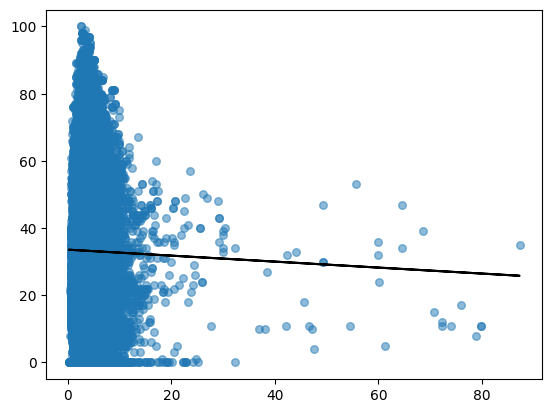

In [245]:
scatter_with_trend(df, 'durarion_m')

Наблюдается зависимость: чем длинне трек, тем он менее популярен, но зависимость не сильная
Рассмотрим меньший промежуток

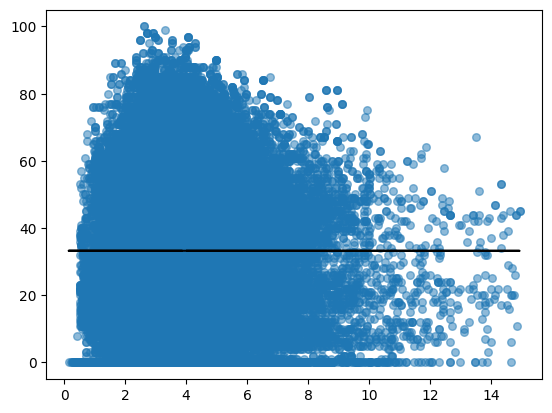

In [246]:
scatter_with_trend(df[df['durarion_m'] < 15], 'durarion_m')

На меньшем масштабе зависимость не видна, однако большинство треков имеют длительность от 1 до 8 минут. А самые популярные о 2 до 5, что гооврит о важности длительности для популярности трека

## Зависимость популярности от громкости

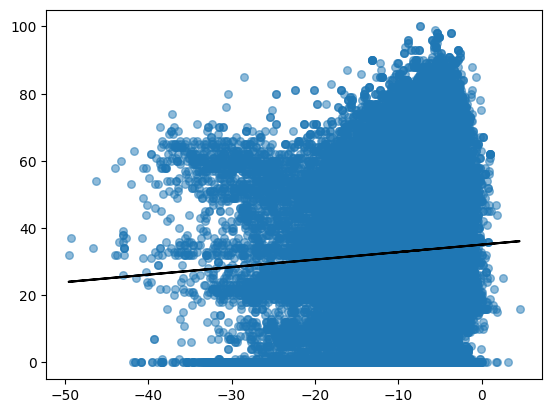

In [247]:
scatter_with_trend(df, 'loudness')

Чем выше громкость, тем популярней, в среднем трек, а самые популярные имею громкость от -10 до -5

## Зависимость Жанра

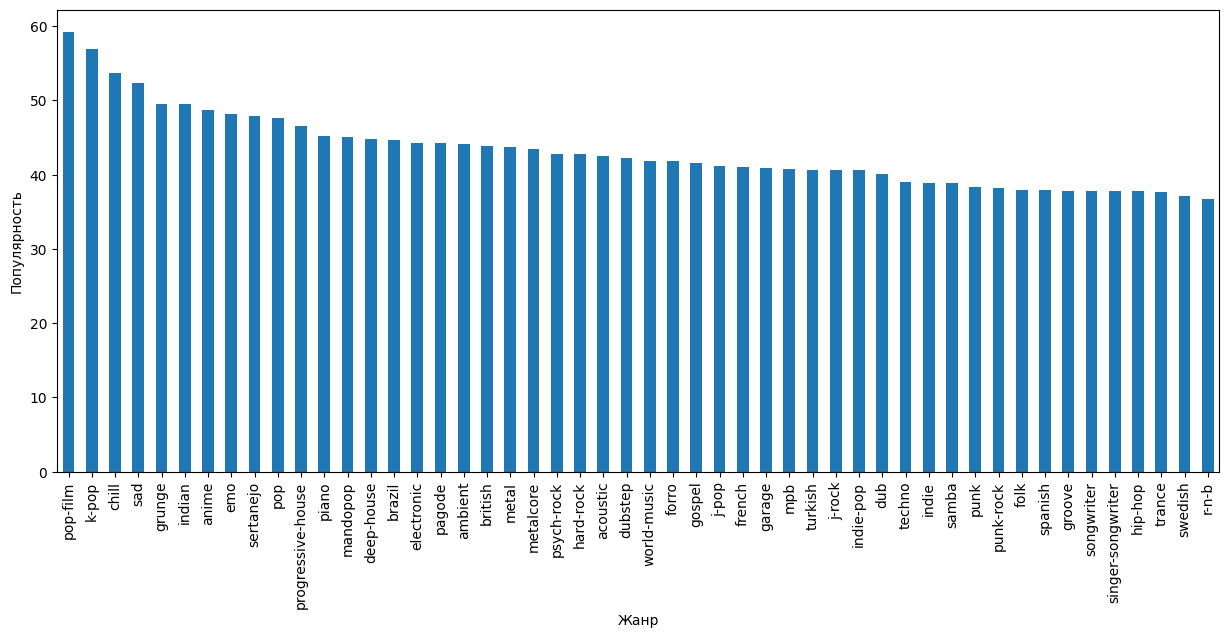

In [248]:
plt.figure(figsize=(15,6))
generes_df = df_original.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).head(50)
generes_df.plot(kind='bar')
plt.xlabel("Жанр")
plt.ylabel("Популярность")
plt.show()

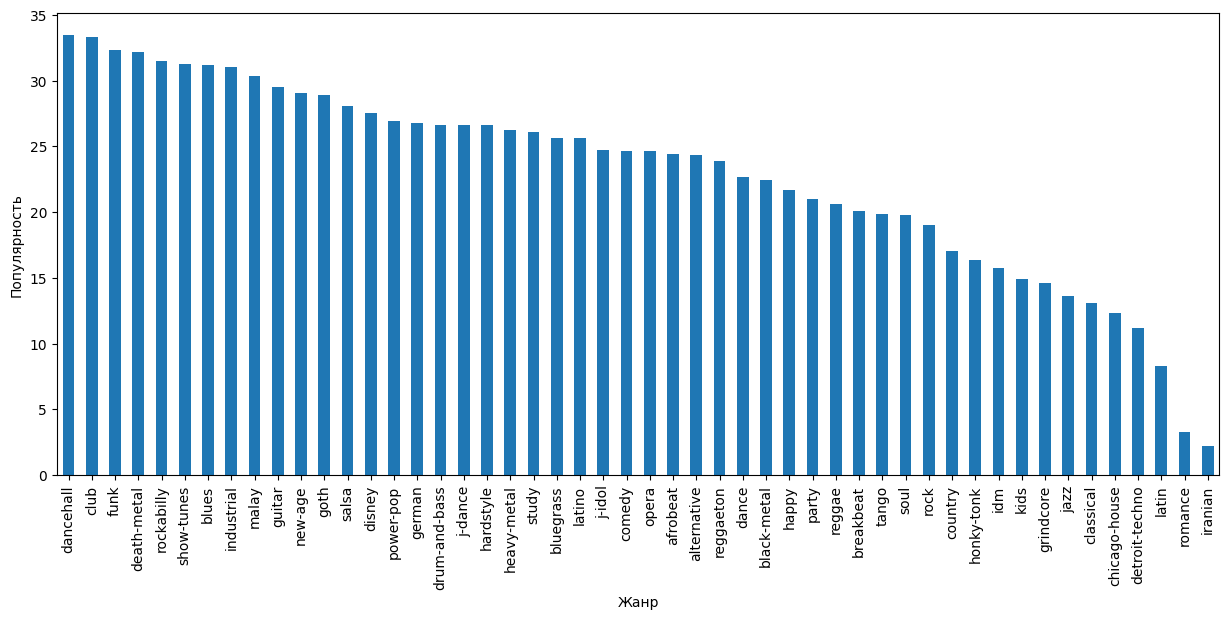

In [249]:
plt.figure(figsize=(15,6))
generes_df = df_original.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).tail(50)
generes_df.plot(kind='bar')
plt.xlabel("Жанр")
plt.ylabel("Популярность")
plt.show()

Самые популярные жанры связаны с массовой культурой: pop, k-pop, pop-film либо относятся к странам с большим населением: indian, brazilian, так же есть жанры с расплывчачтым опсанием, которое можно приписать множеству треков: sad, chill.
Самые непопулярные треки: национальные из небольших стран(iranian, italian), классическая музыка и нишевые жанры с небольшой аудиротей

## Зависимость от explicit

<Axes: xlabel='explicit', ylabel='popularity'>

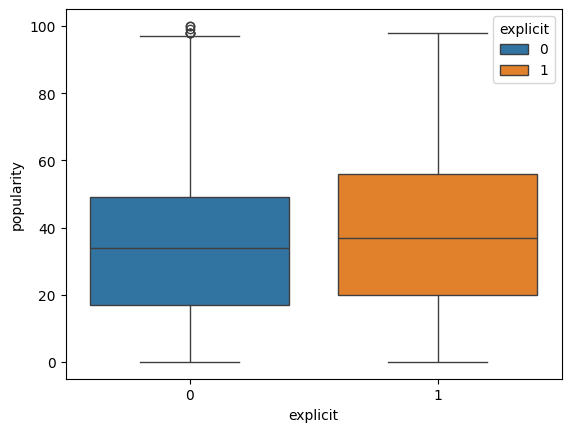

In [250]:
sns.boxplot(x='explicit', y='popularity', data=df, hue='explicit')

Треки с explicit несного популярнее, однако у треков без имеется всплеск популярных треков

## Зависимость от популярности исполнителей

In [251]:
df =groupby_and_merge(df, 'artists')
df

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,durarion_m,artists_popularity
0,10357,8100,11741,73,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0,3.844433,58.000000
1,3287,14796,22528,55,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0,2.493500,42.923077
2,12397,39162,60774,57,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0,3.513767,57.000000
3,14839,8580,9580,71,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0,3.365550,53.933333
4,5255,16899,25689,82,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0,3.314217,41.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22486,66,53329,21,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113,6.416650,23.500000
113995,22486,66,65090,22,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113,6.416667,23.500000
113996,4952,5028,38207,22,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113,4.524433,26.428571
113997,18534,7238,21507,41,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113,4.731550,33.333333


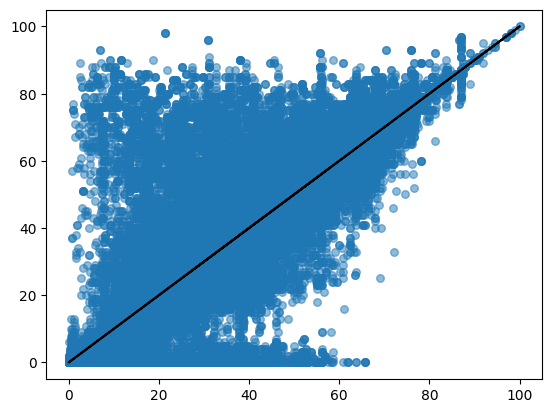

In [252]:
scatter_with_trend(df, "artists_popularity")

На графике видна очень сильная зависимость между популярностью трека и популярностью исполнителя. Это объясняется большим вниманием со стороны слушателей к популярным исполнителям

## Зависимость от количества исполнителей

In [253]:
df['artists_count'] = df_original['artists'].str.count(';') + 1
df.dropna(inplace=True)

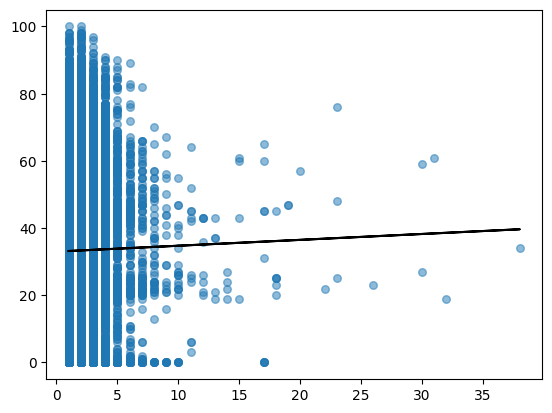

In [254]:
scatter_with_trend(df, 'artists_count')

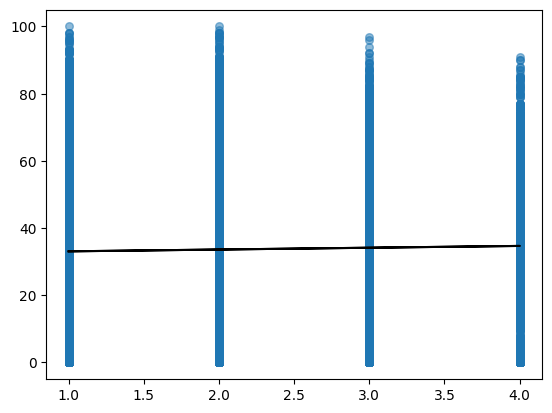

In [255]:
scatter_with_trend(df[df['artists_count'] < 5], 'artists_count')

Чем больше исполнителей, тем популярнее трек, это можно объяснить смешиавнием аудиторий.

Также проверим, что треки с 2 исполнителями популярнее треков с одним

<Axes: xlabel='artists_count'>

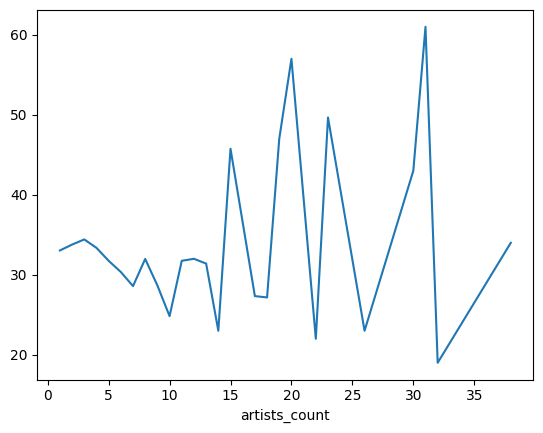

In [256]:
df.groupby('artists_count').mean()['popularity'].plot(x='artists_count', y='popularity')

непонятно насколько имеют смысл вспелски после artists_count=5. Рассмотрим количество таких треков

<Axes: xlabel='artists_count'>

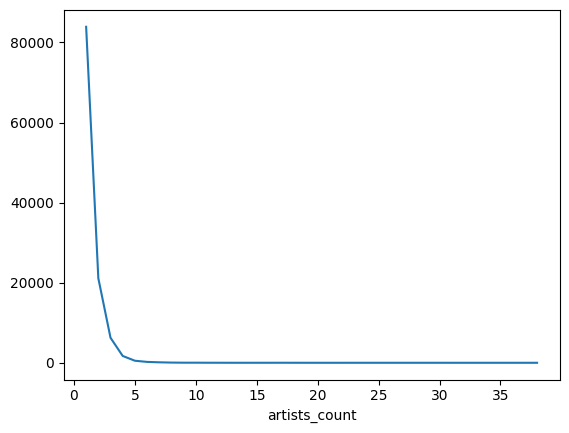

In [257]:
df.groupby('artists_count').count()['popularity'].plot(x='artists_count', y='popularity')

треков с несколькими исполнителями очень мало, рассмотрим ближе при artists_count < 5

<Axes: xlabel='artists_count'>

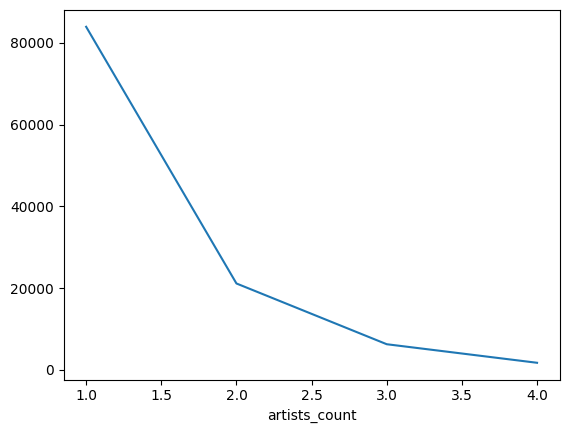

In [258]:
df[df["artists_count"]<5].groupby('artists_count').count()['popularity'].plot(x='artists_count', y='popularity')

Из этих двух графикоф можно сделать вывод, что треки с 2 исполнителями популярнее, хоть их и меньше. Рассматривать большее количество не имеет смысла из-за слишом маленькой выборки, в сравнении с 1 и 2 исполнителями

In [259]:
df

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,durarion_m,artists_popularity,artists_count
0,10357,8100,11741,73,0,0.676,0.4610,1,-6.746,0,...,0.0322,0.000001,0.3580,0.7150,87.917,4,0,3.844433,58.000000,1.0
1,3287,14796,22528,55,0,0.420,0.1660,1,-17.235,1,...,0.9240,0.000006,0.1010,0.2670,77.489,4,0,2.493500,42.923077,1.0
2,12397,39162,60774,57,0,0.438,0.3590,0,-9.734,1,...,0.2100,0.000000,0.1170,0.1200,76.332,4,0,3.513767,57.000000,2.0
3,14839,8580,9580,71,0,0.266,0.0596,0,-18.515,1,...,0.9050,0.000071,0.1320,0.1430,181.740,3,0,3.365550,53.933333,1.0
4,5255,16899,25689,82,0,0.618,0.4430,2,-9.681,1,...,0.4690,0.000000,0.0829,0.1670,119.949,4,0,3.314217,41.727273,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22486,66,53329,21,0,0.172,0.2350,5,-16.393,1,...,0.6400,0.928000,0.0863,0.0339,125.995,5,113,6.416650,23.500000,1.0
113995,22486,66,65090,22,0,0.174,0.1170,0,-18.318,0,...,0.9940,0.976000,0.1050,0.0350,85.239,4,113,6.416667,23.500000,1.0
113996,4952,5028,38207,22,0,0.629,0.3290,0,-10.895,0,...,0.8670,0.000000,0.0839,0.7430,132.378,4,113,4.524433,26.428571,1.0
113997,18534,7238,21507,41,0,0.587,0.5060,7,-10.889,1,...,0.3810,0.000000,0.2700,0.4130,135.960,4,113,4.731550,33.333333,1.0


# Работа со столбцами

1. Объединим параметры с высокой корреляцией
2. Уберем более не нужные параметры

In [260]:
df

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,durarion_m,artists_popularity,artists_count
0,10357,8100,11741,73,0,0.676,0.4610,1,-6.746,0,...,0.0322,0.000001,0.3580,0.7150,87.917,4,0,3.844433,58.000000,1.0
1,3287,14796,22528,55,0,0.420,0.1660,1,-17.235,1,...,0.9240,0.000006,0.1010,0.2670,77.489,4,0,2.493500,42.923077,1.0
2,12397,39162,60774,57,0,0.438,0.3590,0,-9.734,1,...,0.2100,0.000000,0.1170,0.1200,76.332,4,0,3.513767,57.000000,2.0
3,14839,8580,9580,71,0,0.266,0.0596,0,-18.515,1,...,0.9050,0.000071,0.1320,0.1430,181.740,3,0,3.365550,53.933333,1.0
4,5255,16899,25689,82,0,0.618,0.4430,2,-9.681,1,...,0.4690,0.000000,0.0829,0.1670,119.949,4,0,3.314217,41.727273,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22486,66,53329,21,0,0.172,0.2350,5,-16.393,1,...,0.6400,0.928000,0.0863,0.0339,125.995,5,113,6.416650,23.500000,1.0
113995,22486,66,65090,22,0,0.174,0.1170,0,-18.318,0,...,0.9940,0.976000,0.1050,0.0350,85.239,4,113,6.416667,23.500000,1.0
113996,4952,5028,38207,22,0,0.629,0.3290,0,-10.895,0,...,0.8670,0.000000,0.0839,0.7430,132.378,4,113,4.524433,26.428571,1.0
113997,18534,7238,21507,41,0,0.587,0.5060,7,-10.889,1,...,0.3810,0.000000,0.2700,0.4130,135.960,4,113,4.731550,33.333333,1.0


Energy имеет положительную корреляцию с liveness(0.18), valance(0.26) tempo(0.25), time_signature(0.19) и очень высокую с loudness(0.76). Это говорит о том, что эти параметры помогают сделать трек более энергичным.  
Так же есть большая отрицательная корреляция между acousticness и energy(-0.73), loudness(-0.59), tempo(-0.21), time_signature(-0.18). Акустические треки противопосталены энергичным.  
Далее danceability и valance(0.48) - связь между приятностью и танцевальностью музыки.  
Speechiness и explicit(0.31) - чем больше в треке говорят, тем вероятней там есть нецензурная брань и откровенные сцены.  

Важно заметить, что популярность пректически не имеет корреляции ни с одним из признаков, что говорит об отсутствии перевеса к одной из характеристик

In [261]:
df['balanced_energy'] = df['liveness'] * df['tempo'] * df['time_signature'] * df['loudness']
df['danceability_and_valence'] = df['danceability'] * df['valence']
df['acoustisticness_and_energy'] = df['balanced_energy'] * df["acousticness"] # используем только balanced_energy, так как она зависит от тех же параметров, что и acousticness

In [262]:
# Удаляем использованные столбцы. artists тоже, так как, мы сохранили количество исполнителей
df.drop(['artists','liveness', 'tempo', 'time_signature', 'loudness', 'danceability', 'valence', "acousticness"], axis=1, inplace=True)

## Проверка данных перед обучением модели

In [263]:
df

,album_name,track_name,popularity,explicit,energy,key,mode,speechiness,instrumentalness,track_genre,durarion_m,artists_popularity,artists_count,balanced_energy,danceability_and_valence,acoustisticness_and_energy
0,8100,11741,73,0,0.4610,1,0,0.1430,0.000001,0,3.844433,58.000000,1.0,-849.302133,0.483340,-27.347529
1,14796,22528,55,0,0.1660,1,1,0.0763,0.000006,0,2.493500,42.923077,1.0,-539.551258,0.112140,-498.545362
2,39162,60774,57,0,0.3590,0,1,0.0557,0.000000,0,3.513767,57.000000,2.0,-347.731342,0.052560,-73.023582
3,8580,9580,71,0,0.0596,0,1,0.0363,0.000071,0,3.365550,53.933333,1.0,-1332.506776,0.038038,-1205.918632
4,16899,25689,82,0,0.4430,2,1,0.0526,0.000000,0,3.314217,41.727273,1.0,-385.062631,0.103206,-180.594374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,66,53329,21,0,0.2350,5,1,0.0422,0.928000,113,6.416650,23.500000,1.0,-891.235649,0.005831,-570.390815
113995,66,65090,22,0,0.1170,0,0,0.0401,0.976000,113,6.416667,23.500000,1.0,-655.791361,0.006090,-651.856613
113996,5028,38207,22,0,0.3290,0,0,0.0420,0.000000,113,4.524433,26.428571,1.0,-484.021889,0.467347,-419.646978
113997,7238,21507,41,0,0.5060,7,1,0.0297,0.000000,113,4.731550,33.333333,1.0,-1598.905915,0.242431,-609.183154


In [264]:
df.isnull().sum()

album_name                    0
track_name                    0
popularity                    0
explicit                      0
energy                        0
key                           0
mode                          0
speechiness                   0
instrumentalness              0
track_genre                   0
durarion_m                    0
artists_popularity            0
artists_count                 0
balanced_energy               0
danceability_and_valence      0
acoustisticness_and_energy    0
dtype: int64

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113998 entries, 0 to 113998
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   album_name                  113998 non-null  int64  
 1   track_name                  113998 non-null  int64  
 2   popularity                  113998 non-null  int64  
 3   explicit                    113998 non-null  int64  
 4   energy                      113998 non-null  float64
 5   key                         113998 non-null  int64  
 6   mode                        113998 non-null  int64  
 7   speechiness                 113998 non-null  float64
 8   instrumentalness            113998 non-null  float64
 9   track_genre                 113998 non-null  int64  
 10  durarion_m                  113998 non-null  float64
 11  artists_popularity          113998 non-null  float64
 12  artists_count               113998 non-null  float64
 13  balanced_energy    

# Обучение модели

In [266]:
# Разделение данных на обучающую и тестовую выборки
X = df.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо
y = df['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 344.3815 - val_loss: 140.1389
Epoch 2/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 151.1975 - val_loss: 139.6308
Epoch 3/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 144.5079 - val_loss: 138.7926
Epoch 4/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 140.9909 - val_loss: 137.9718
Epoch 5/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 138.8539 - val_loss: 137.9462
Epoch 6/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 140.2253 - val_loss: 138.1729
Epoch 7/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 136.7462 - val_loss: 138.2247
Epoch 8/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 139.1850 - val_loss: 137.9029
Epoch 9/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 137.2889 - val_loss: 138.3279
Epoch 10/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 134.0740 - val_loss: 140.0331
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - loss: 132.1762
Test Loss: 134.706

In [268]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step
MAE: 6.754256248474121
RMSE: 11.606297697381123


In [269]:
# mape очень большое из-за нулей и получающегося деления на эпсилон
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

7466672868818944.0

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
713/713 ━━━

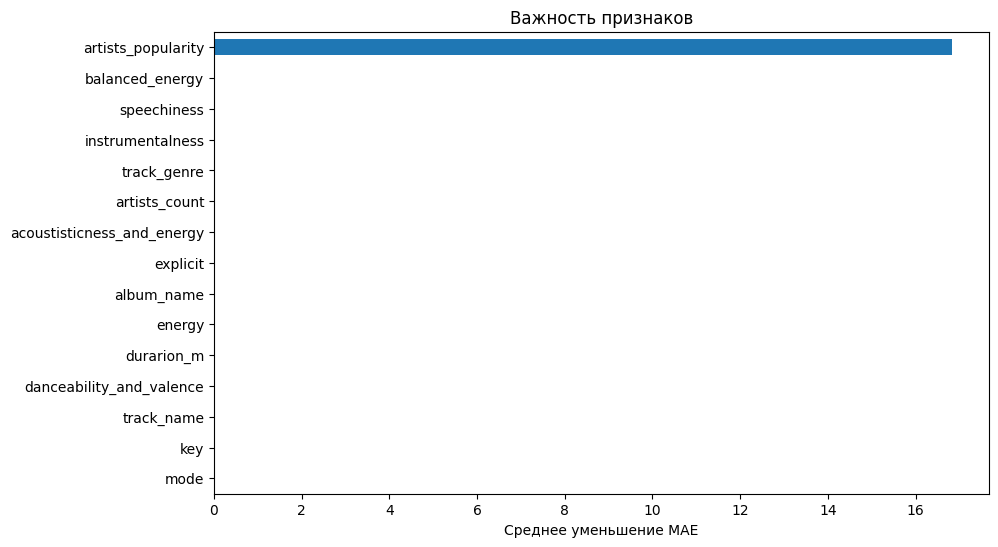

In [280]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

In [271]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter= 1000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
score = logreg.score(X_train, y_train)
acc_log = round(score * 100, 5)


print(score)
print(acc_log)

0.1732713436698173
17.32713


In [272]:
# k-NN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
score = knn.score(X_train, y_train)
acc_knn = round(score * 100, 2)

print(score)
print(acc_knn)

0.4122129871269107
41.22


In [273]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
score = perceptron.score(X_train, y_train)
acc_perceptron = round(score * 100, 5)

print(score)
print(acc_perceptron)

0.11639509638369262
11.63951


In [274]:

score = cross_val_score(knn, X, y, cv=10, scoring="r2")
knn_score = score.mean()
print(score)
print(knn_score)


c:\Users\SystemX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[-0.63169576 -0.62063392 -0.53929879 -0.53178718 -0.58601784 -0.5423442
 -0.56757281 -0.50900112 -0.53257989 -0.66135361]
-0.5722285130434297


In [275]:
acc_knn = round(knn.score(X_test, y_test) * 100, 5)
acc_knn

19.62719

In [276]:

score = cross_val_score(perceptron, X, y, cv=10, scoring="r2")
perceptron_score = score.mean()
print(score)
print(perceptron_score)

c:\Users\SystemX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[-0.87738271 -0.09448657 -1.74143565 -0.32574634 -1.15996562 -0.1027125
 -0.46477994 -0.23177801 -0.50049061 -1.12899933]
-0.6627777278765732


In [277]:
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 5)
acc_perceptron

11.88596

In [278]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 5)
acc_random_forest

48.99123

In [279]:
df

,album_name,track_name,popularity,explicit,energy,key,mode,speechiness,instrumentalness,track_genre,durarion_m,artists_popularity,artists_count,balanced_energy,danceability_and_valence,acoustisticness_and_energy
0,8100,11741,73,0,0.4610,1,0,0.1430,0.000001,0,3.844433,58.000000,1.0,-849.302133,0.483340,-27.347529
1,14796,22528,55,0,0.1660,1,1,0.0763,0.000006,0,2.493500,42.923077,1.0,-539.551258,0.112140,-498.545362
2,39162,60774,57,0,0.3590,0,1,0.0557,0.000000,0,3.513767,57.000000,2.0,-347.731342,0.052560,-73.023582
3,8580,9580,71,0,0.0596,0,1,0.0363,0.000071,0,3.365550,53.933333,1.0,-1332.506776,0.038038,-1205.918632
4,16899,25689,82,0,0.4430,2,1,0.0526,0.000000,0,3.314217,41.727273,1.0,-385.062631,0.103206,-180.594374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,66,53329,21,0,0.2350,5,1,0.0422,0.928000,113,6.416650,23.500000,1.0,-891.235649,0.005831,-570.390815
113995,66,65090,22,0,0.1170,0,0,0.0401,0.976000,113,6.416667,23.500000,1.0,-655.791361,0.006090,-651.856613
113996,5028,38207,22,0,0.3290,0,0,0.0420,0.000000,113,4.524433,26.428571,1.0,-484.021889,0.467347,-419.646978
113997,7238,21507,41,0,0.5060,7,1,0.0297,0.000000,113,4.731550,33.333333,1.0,-1598.905915,0.242431,-609.183154


# Вывод

В ходе работы мы рассмотрели характеристики и их корреляцию, обработали данные и вывели важные столбцы(artists_popularity, artists_count, acoustisticness_and_energy)


И рассмотрены модели:  
Нейронных сетей с MAE 6.22  
Логистической регрессии с точностью 17.32713  
Классификатор kNN с точностью 41.22   
Perceptron с точностью 11.63951 
Random Forest с точностью 48.99123

Лучший результат имеет Random Forest, предсказывая в половине случаев

Самой важной характеристикой оказалась популярность исполнителя, это легко объясняется тем фактом, что они имеют базу фанатов, которые больше следят за их треками и обеспечивают популярность.